## 0. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

font = {'weight' : 'bold',
        'size'   : 14}

%matplotlib inline
# SET PATH
PATH = 'Dataset/NSL-KDD/'

### 0.1. DATASET

col_names are same for the both the dataset!!

In [5]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level']


In [6]:
# attach the column names to the dataset
df = pd.read_csv(PATH+ 'KDDTrain+.txt', header=None, names = col_names)
df_test = pd.read_csv(PATH+ 'KDDTest+.txt', header=None, names = col_names)

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


Though the dimensions are same but the values which are there are different. <br>
Like in services there are some values which are only present in train dataset but not in train.<br>
Better to take all and make 0 for those not present.

### df.head()

In [7]:
## Run the below cell to see detailed info.!
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [ ]:
def get_details(df):
    print('COLUMN NAME:\t Unique Values')
    for i in df.columns :
        print('{} : {}'.format(i, df[i].nunique()))

        value_counts = df[i].value_counts()
        if len(value_counts)>= 5:
            print('\'Top 5 values\'')
            print(value_counts[:5])
        else:
            print(value_counts)
        print('*-'*20)

## 1. EDA

> Distribution of different categories.

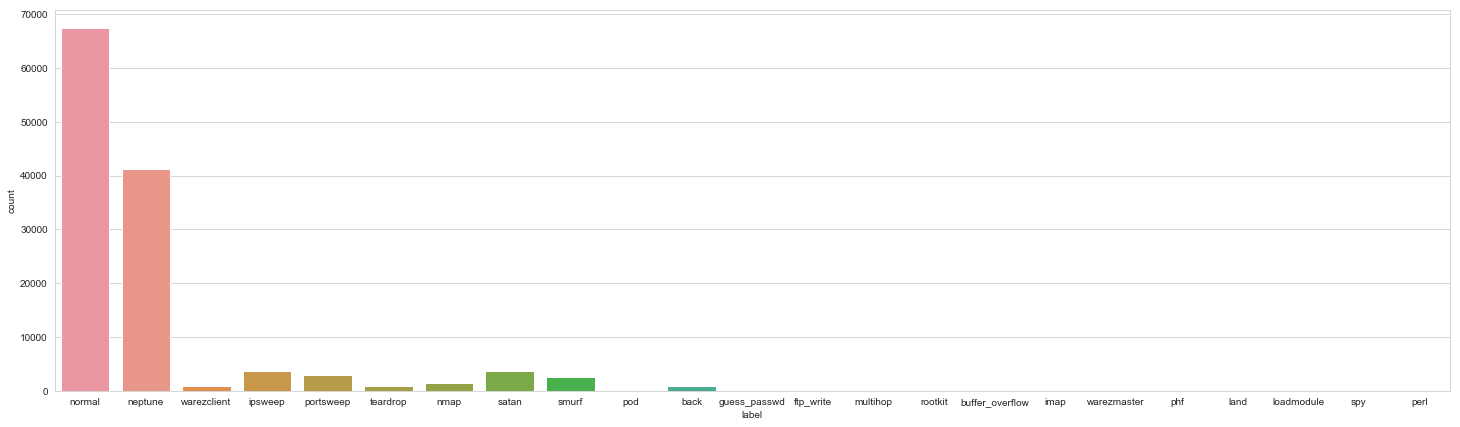

In [8]:
plt.figure(figsize = (25,7))
plt.tight_layout()
sns.countplot(x ='label', data = df)

**Different categories available**

In [9]:
print('TRAINING SET LABEL DISTRIBUTION --')
print(df['label'].value_counts())
print('','*.*.*.'*20,'',sep = '\n\n')
print('TEST SET LABEL DISTRIBUTION --')
print(df_test['label'].value_counts())

TRAINING SET LABEL DISTRIBUTION --
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.*.


TEST SET LABEL DISTRIBUTION --
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf           

In [10]:
df['label'].unique()


array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
'''

labels = df['label'].nunique()
fig, axs = plt.subplots(nrows = labels,figsize = (23,7*labels))
for i,j in enumerate(df['label'].unique()):
    sns.heatmap(df[df['label']==j][col_names][:-2].corr(method='spearman'), cmap='Blues', annot=True,
                ax = axs[i])
    axs[i].title.set_text(j)
    '''
;

In [11]:
# object type can be dummified
# This could be added then be fed to the model.
print('TRAIN DATA\n')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
        
print('\nTEST DATA\n')

for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

TRAIN DATA

Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

TEST DATA

Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


> **Difference between test and train dataset. Missing Parameters**
(not exactly missing)

In [12]:
print('Services')
print(list(set(df['service'].unique()) - set(df_test['service'].unique())))
print(list(set(df_test['service'].unique()) - set(df['service'].unique())))
print('Protocol Type')
print(list(set(df['protocol_type'].unique()) - set(df_test['protocol_type'].unique())))
print(list(set(df_test['protocol_type'].unique()) - set(df['protocol_type'].unique())))
print('Flag')
print(list(set(df['flag'].unique()) - set(df_test['flag'].unique())))
print(list(set(df_test['flag'].unique()) - set(df['flag'].unique())))
print('label')
print(list(set(df['label'].unique()) - set(df_test['label'].unique())))
print(list(set(df_test['label'].unique()) - set(df['label'].unique())))

Services
['aol', 'http_2784', 'urh_i', 'http_8001', 'harvest', 'red_i']
[]
Protocol Type
[]
[]
Flag
[]
[]
label
['spy', 'warezclient']
['mscan', 'saint', 'snmpguess', 'xlock', 'sendmail', 'sqlattack', 'mailbomb', 'processtable', 'xterm', 'worm', 'ps', 'udpstorm', 'snmpgetattack', 'httptunnel', 'named', 'apache2', 'xsnoop']


In [14]:
x = list(set(df['service'].unique()) - set(df_test['service'].unique()))
for i in x:
    df_test['service_'+i] = 0

**Get more insight run cell below**

In [ ]:
# Get more insight run cell below
#get_details(df)

In [ ]:
#df['serror_rate'].value_counts()

In [15]:
# ADD DUMMIES
prot_type = pd.get_dummies(df['protocol_type'],prefix='protocol')
service = pd.get_dummies(df['service'],prefix='service')
flag = pd.get_dummies(df['flag'], prefix='flag')

# Test dataset DUMMIES

prot_type_test = pd.get_dummies(df_test['protocol_type'], prefix = 'protocol')
service_test = pd.get_dummies(df_test['service'], prefix = 'service')
flag_test = pd.get_dummies(df_test['flag'], prefix = 'flag')

> **Difficulty level - How difficult was it to identify the threat. We deceided to remove it.**


In [16]:

df['difficulty_level'].value_counts()

21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: difficulty_level, dtype: int64

## 2. Preparing the *Dataset*

> Adding Dataframes having binary values

In [19]:
prot_type_test.head()

,protocol_icmp,protocol_tcp,protocol_udp
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [20]:
new_df = df.drop(labels=['protocol_type', 'service','flag', 'difficulty_level'], axis = 1)
new_df = pd.concat([new_df,prot_type, service, flag], axis = 1)
## TEST DATASET
new_df_test = df_test.drop(labels=['protocol_type', 'service','flag', 'difficulty_level'], axis = 1)
new_df_test = pd.concat([new_df_test,prot_type_test, service_test, flag_test], axis = 1)



In [21]:
new_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
new_df_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Sanity check**

In [23]:
# Train dataset
new_df['service_http'][:5]

0    0
1    0
2    0
3    1
4    1
Name: service_http, dtype: uint8

In [24]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [25]:
new_df_test['protocol_tcp'][:5]

0    1
1    1
2    1
3    0
4    1
Name: protocol_tcp, dtype: uint8

In [26]:
# Test dataset
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,service_aol,service_http_2784,service_urh_i,service_http_8001,service_harvest,service_red_i
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1.00,1.00,neptune,21,0,0,0,0,0,0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.00,1.00,neptune,21,0,0,0,0,0,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.00,0.00,normal,21,0,0,0,0,0,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,0.00,saint,15,0,0,0,0,0,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.83,0.71,mscan,11,0,0,0,0,0,0


The new feature count is 122. (As we one hot encoded the features) 

> **New columns**

In [27]:
new_df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=123)

### 2.1 Goodify 

![Attack Categories](1.JPG "Attack Categories")
![Attack Categories](2.JPG "Attack Categories")

> Taken from two different papers! [link](http://eprints.iisc.ernet.in/26885/1/darpa.pdf) [link](http://airccse.org/journal/nsa/0512nsa08.pdf)

**5 Dataset based on different categories.**<br>
Later we can tweek to determine the exact attack type. Now focusing only on the broad categories.

In [28]:
# 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
label_dict = { 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
 'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
 'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
 'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4}

len(label_dict)

40

In [29]:
new_df_test['label'].apply(lambda x: label_dict[x]).value_counts()

0    9711
1    7460
3    2885
2    2421
4      67
Name: label, dtype: int64

> **5 Datasets**

In [30]:
# New Labels added
new_df['label'] = new_df['label'].apply(lambda x: label_dict[x])
new_df['label'][:4]


0    0
1    0
2    1
3    0
Name: label, dtype: int64

In [31]:
new_df_test['label'] = new_df_test['label'].apply(lambda x: label_dict[x])
new_df_test['label'][:4]

0    1
1    1
2    0
3    2
Name: label, dtype: int64

In [38]:
print('Test','\n',new_df_test['label'].value_counts())
print('Train','\n',new_df['label'].value_counts())

Test 
 0    9711
1    7460
3    2885
2    2421
4      67
Name: label, dtype: int64
Train 
 0    67343
1    45927
2    11656
3      995
4       52
Name: label, dtype: int64


In [39]:
# 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
normal_df = new_df[new_df['label'] == 0].drop(columns = ['label'])
dos_df = new_df[new_df['label'] == 1].drop(columns = ['label'])
probe_df = new_df[new_df['label'] == 2].drop(columns = ['label'])
r2l_df = new_df[new_df['label'] == 3].drop(columns = ['label'])
u2r_df = new_df[new_df['label'] == 4].drop(columns = ['label'])


**Store datasets**

In [40]:
#normal_df.to_csv(PATH+'normal_df.csv',index = False)
dos_df.to_csv(PATH+'dos_df.csv',index = False)
probe_df.to_csv(PATH+'probe_df.csv',index = False)
r2l_df.to_csv(PATH+'r2l_df.csv',index = False)
u2r_df.to_csv(PATH+'u2r_df.csv',index = False)
## Above are redundant saved why?
new_df.to_csv(PATH+'combined_df.csv',index = False)

## Save the test dataset

In [42]:
new_df_test.to_csv(PATH+'combined_test_df.csv', index = False)

In [ ]:
new_df.head()

In [43]:
pd.read_csv(PATH+'combined_test_df.csv')['label'].value_counts()

0    9711
1    7460
3    2885
2    2421
4      67
Name: label, dtype: int64

In [ ]:
normal_df.columns

Different model for different dataset.<br>
ensemble.<br>
correct and important features.. due to 25th june.<br>

In [ ]:
normal_df.head()

In [ ]:
normal_df.columns

In [ ]:
import pickle as pkl

In [ ]:
with open("ids_dataframe.pkl", 'wb') as pkl_data:
    pkl.dump(normal_df, pkl_data)

In [ ]:
with open("ids_dataframe.pkl", 'wb') as pkl_data:
    pkl.dump(new_df, pkl_data)